In [44]:
from PyPDF2 import PdfReader
import re
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
from gensim import corpora, models
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

#nltk.download('stopwords')

In [20]:
def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PdfReader(file)
        num_pages = len(pdf_reader.pages)

        text = ''
        for page in pdf_reader.pages:
            text += page.extract_text()
        
        return text

In [21]:
book1_eng_path = 'books\english books\J.R.R. Tolkien - The Hobbit, or There and Back Again.pdf'
book2_eng_path = 'books\english books\J.R.R. Tolkien - The Lord of the Rings. The Fellowship Of The Ring.pdf'
book3_eng_path = 'books\english books\J.R.R. Tolkien - The Lord of the Rings. The Two Towers.pdf'
book4_eng_path = 'books\english books\J.R.R. Tolkien - The Lord of the Rings. The return of the King.pdf'

book1_eng = read_pdf(book1_eng_path)
book2_eng = read_pdf(book2_eng_path)
book3_eng = read_pdf(book3_eng_path)
book4_eng = read_pdf(book4_eng_path)

In [22]:
def cleaned_book(text):
    temp = re.sub("\s{2,}", " ", text)  # Usunięcie podwójnych spacji
    temp = re.sub("(\r\n|\r|\n)", " ", temp)  # Usunięcie przerw między słowami, entery
    temp = temp.lower()  # Zamiana wszystkich znaków na małe litery
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp)  # Usunięcie znaków specjalnych
    temp = re.sub("[^\w\s]", "", temp)  # Usunięcie znaków specjalnych
    temp = temp.strip()  # Usunięcie spacji lub odstępów na końcach tekstu

    # Usunięcie stop words w języku angielskim
    stopwords_set = set(stopwords.words('english'))

    # Tokenizacja tekstu za pomocą biblioteki NLTK
    cleaned_and_tokenized = word_tokenize(temp)

    # Usunięcie stop words
    cleaned_and_tokenized_without_stopwords = [word for word in cleaned_and_tokenized if word.lower() not in stopwords_set]

    return cleaned_and_tokenized_without_stopwords

In [23]:
book1_eng_cleaned = cleaned_book(book1_eng)
book2_eng_cleaned = cleaned_book(book2_eng)
book3_eng_cleaned = cleaned_book(book3_eng)
book4_eng_cleaned = cleaned_book(book4_eng)

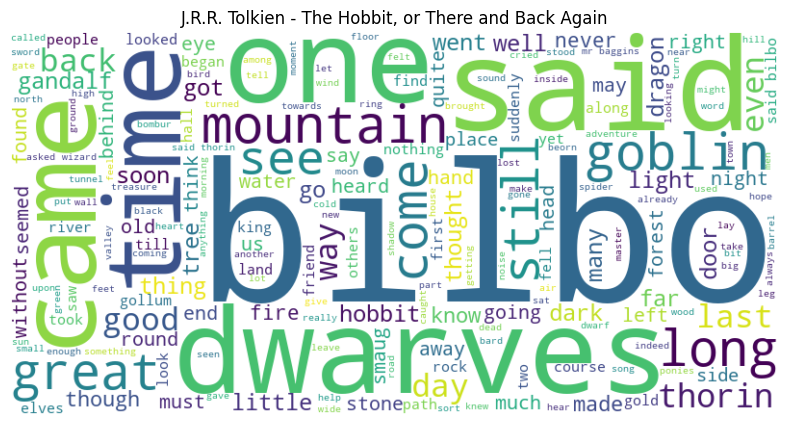

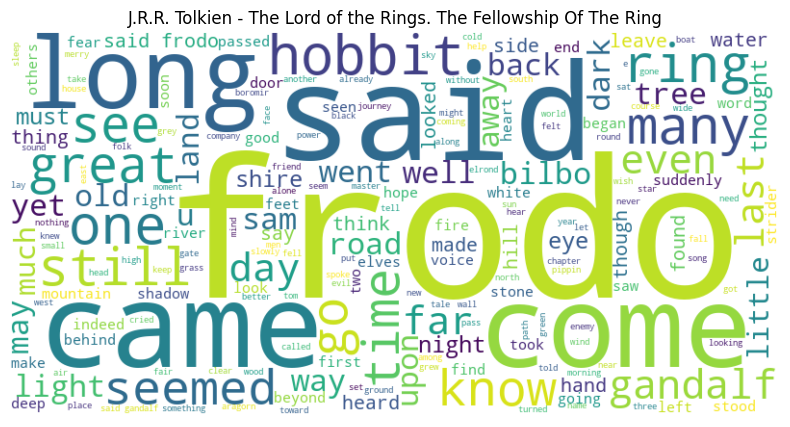

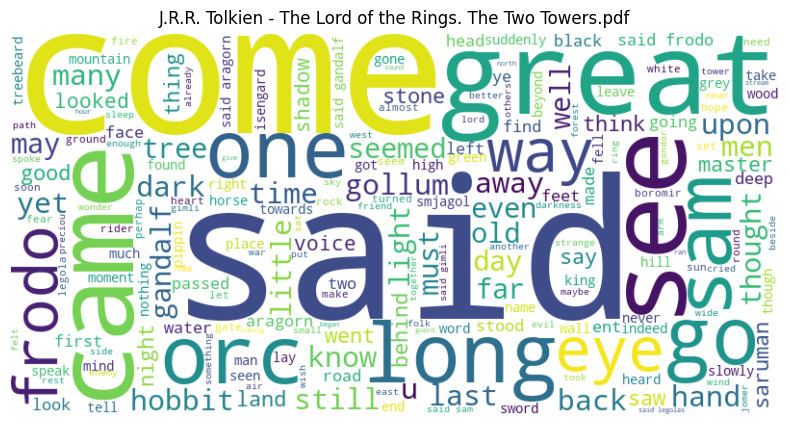

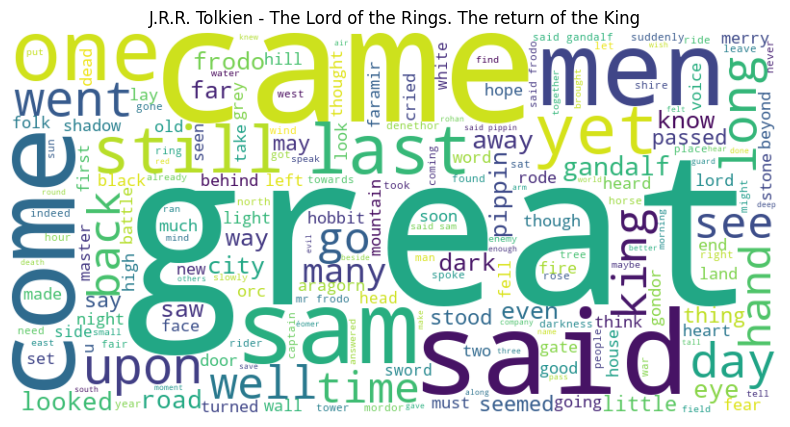

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Funkcja generująca chmurę słów i wyświetlająca ją na wykresie
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)  # Dodanie podpisu
    plt.show()

# Generowanie chmur słów dla oczyszczonych książek
generate_wordcloud(book1_eng_cleaned, "J.R.R. Tolkien - The Hobbit, or There and Back Again")
generate_wordcloud(book2_eng_cleaned, "J.R.R. Tolkien - The Lord of the Rings. The Fellowship Of The Ring")
generate_wordcloud(book3_eng_cleaned, "J.R.R. Tolkien - The Lord of the Rings. The Two Towers.pdf")
generate_wordcloud(book4_eng_cleaned, "J.R.R. Tolkien - The Lord of the Rings. The return of the King")


In [25]:
corpus = []
corpus.extend(book1_eng_cleaned)
corpus.extend(book2_eng_cleaned)
corpus.extend(book3_eng_cleaned)
corpus.extend(book4_eng_cleaned)

In [26]:
print(len(corpus))

277317


In [27]:
word_count = 0

for chapter in corpus:
    word_count += chapter.count("chapter")

print("Liczba wystąpień słowa 'chapter':", word_count)

Liczba wystąpień słowa 'chapter': 180


In [47]:
def split_into_chapters(text):
    chapters = re.split(r'Chapter\s+\d+', text)
    # Usuwanie pustych rozdziałów
    chapters = [chapter.strip() for chapter in chapters if chapter.strip()]
    return chapters

def read_pdf(file_path, start_page = 0):
    with open(file_path, 'rb') as file:
        pdf_reader = PdfReader(file)
        num_pages = len(pdf_reader.pages)

        text = ''
        for page in pdf_reader.pages[start_page:]:
            text += page.extract_text()

        return text

def split_book_into_chapters(book_text):
    chapters = split_into_chapters(book_text)
    return chapters

In [56]:
book1_eng = read_pdf('books\english books\J.R.R. Tolkien - The Hobbit, or There and Back Again.pdf')
book2_eng = read_pdf('books\english books\J.R.R. Tolkien - The Lord of the Rings. The Fellowship Of The Ring.pdf', start_page = 5)
book3_eng = read_pdf('books\english books\J.R.R. Tolkien - The Lord of the Rings. The Two Towers.pdf')
book4_eng = read_pdf('books\english books\J.R.R. Tolkien - The Lord of the Rings. The return of the King.pdf', start_page = 1)

In [57]:
book1_eng_chapters = split_book_into_chapters(book1_eng)
book2_eng_chapters = split_book_into_chapters(book2_eng)
book3_eng_chapters = split_book_into_chapters(book3_eng)
book4_eng_chapters = split_book_into_chapters(book4_eng)

In [60]:
num_chapters_book1 = len(book1_eng_chapters)
num_chapters_book2 = len(book2_eng_chapters)
num_chapters_book3 = len(book3_eng_chapters)
num_chapters_book4 = len(book4_eng_chapters)

print("Liczba rozdziałów w Hobbit, czyli tam i z powrotem:", num_chapters_book1)
print("Liczba rozdziałów w Władca Pierścieni: Drużyna Pierścienia:", num_chapters_book2)
print("Liczba rozdziałów w Władca Pierścieni: Dwie wieże:", num_chapters_book3)
print("Liczba rozdziałów w Władca Pierścieni: Powrót króla:", num_chapters_book4)

Liczba rozdziałów w Hobbit, czyli tam i z powrotem: 19
Liczba rozdziałów w Władca Pierścieni: Drużyna Pierścienia: 23
Liczba rozdziałów w Władca Pierścieni: Dwie wieże: 22
Liczba rozdziałów w Władca Pierścieni: Powrót króla: 21


In [64]:
# Utworzenie korpusu z podzielonych rozdziałów
corpus_chapters = book1_eng_chapters + book2_eng_chapters + book3_eng_chapters + book4_eng_chapters

# Tworzenie etykiet dla rozdziałów
labels = []
for i, chapters in enumerate([book1_eng_chapters, book2_eng_chapters, book3_eng_chapters, book4_eng_chapters]):
    labels += [i] * len(chapters)

# Utworzenie wektorów cech przy użyciu CountVectorizer z reprezentacją binarną
vectorizer_bin = CountVectorizer(analyzer='word', binary=True)
X_bin = vectorizer_bin.fit_transform(corpus_chapters)

# Podział danych na zbiór treningowy i testowy z uwzględnieniem stratyfikacji
X_train_bin, X_test_bin, y_train, y_test = train_test_split(X_bin, labels, test_size=0.2, stratify=labels, random_state=42)

# Inicjalizacja i trenowanie naiwnego klasyfikatora bayesowskiego z wagami binarnymi
classifier_nb_bin = MultinomialNB()
classifier_nb_bin.fit(X_train_bin, y_train)

# Kontynuuj analogicznie dla klasyfikatorów z wagami logarytmicznymi i TF-IDF
# Możesz skopiować kod z poprzedniej odpowiedzi i dostosować go do nowych wektorów cech

# Utworzenie wektorów cech przy użyciu CountVectorizer z wagami logarytmicznymi
vectorizer_log = CountVectorizer(analyzer='word', binary=False)
X_log = vectorizer_log.fit_transform(corpus_chapters)

# Podział danych na zbiór treningowy i testowy z uwzględnieniem stratyfikacji
X_train_log, X_test_log, _, _ = train_test_split(X_log, labels, test_size=0.2, stratify=labels, random_state=42)

# Inicjalizacja i trenowanie naiwnego klasyfikatora bayesowskiego z wagami logarytmicznymi
classifier_nb_log = MultinomialNB()
classifier_nb_log.fit(X_train_log, y_train)

# Utworzenie wektorów cech przy użyciu TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(analyzer='word')
X_tfidf = vectorizer_tfidf.fit_transform(corpus_chapters)

# Podział danych na zbiór treningowy i testowy z uwzględnieniem stratyfikacji
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, labels, test_size=0.2, stratify=labels, random_state=42)

# Inicjalizacja i trenowanie naiwnego klasyfikatora bayesowskiego z wagami TF-IDF
classifier_nb_tfidf = MultinomialNB()
classifier_nb_tfidf.fit(X_train_tfidf, y_train)

# Przewidywanie klas dla zbioru testowego
y_pred_bin = classifier_nb_bin.predict(X_test_bin)
y_pred_log = classifier_nb_log.predict(X_test_log)
y_pred_tfidf = classifier_nb_tfidf.predict(X_test_tfidf)

# Obliczenie dokładności klasyfikacji
accuracy_bin = accuracy_score(y_test, y_pred_bin)
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print("Dokładność klasyfikacji (reprezentacja binarna):", accuracy_bin)
print("Dokładność klasyfikacji (reprezentacja logarytmiczna):", accuracy_log)
print("Dokładność klasyfikacji (TF-IDF):", accuracy_tfidf)

# Macierz pomyłek
confusion_mat_nb_bin = confusion_matrix(y_test, y_pred_bin)
confusion_mat_nb_log = confusion_matrix(y_test, y_pred_log)
confusion_mat_nb_tfidf = confusion_matrix(y_test, y_pred_tfidf)

print("Macierz pomyłek (reprezentacja binarna):")
print(confusion_mat_nb_bin)

print("Macierz pomyłek (reprezentacja logarytmiczna):")
print(confusion_mat_nb_log)

print("Macierz pomyłek (TF-IDF):")
print(confusion_mat_nb_tfidf)

Dokładność klasyfikacji (reprezentacja binarna): 0.8235294117647058
Dokładność klasyfikacji (reprezentacja logarytmiczna): 0.8823529411764706
Dokładność klasyfikacji (TF-IDF): 0.47058823529411764
Macierz pomyłek (reprezentacja binarna):
[[4 0 0 0]
 [1 4 0 0]
 [0 0 4 0]
 [0 1 1 2]]
Macierz pomyłek (reprezentacja logarytmiczna):
[[4 0 0 0]
 [0 5 0 0]
 [0 0 4 0]
 [0 1 1 2]]
Macierz pomyłek (TF-IDF):
[[0 4 0 0]
 [0 5 0 0]
 [0 1 3 0]
 [0 4 0 0]]
